# Import and Data Retrieval

In [1]:
%%time
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt


Wall time: 9.84 s


In [2]:
#read data in from CSV to pandas dataframe
data = pd.read_csv('College Football Offensive Stats - Data.csv')

In [3]:
# Check the first row in the dataframe is as expected
data.head(1)

,Rk,School,G,Pts,PassingCmp,PassingAtt,PassingPct,PassingYds,PassingTD,RushingAtt,...,TotalOffenseAvg,FirstDownsPass,FirstDownsRush,FirstDownsPen,FirstDownsTot,PenaltiesNo,PenaltiesYds,TurnoversFum,TurnoversInt,TurnoversTot
0,1,Ohio State,11,49.4,18.7,27.3,68.7,248.3,3.6,47.7,...,7.1,11.6,14.6,2.2,28.5,5.6,53.4,1.0,0.1,1.1


#Single Feature Linear Model
Goal: Predict points scored on other features


In [4]:
# sns.pairplot(data)

In [6]:
copy = data.copy()
copy = copy.drop(['Rk', 'School', 'G'], axis=1)

In [8]:

train, test = train_test_split(copy, test_size=0.2)

best feature: TotalOffenseYds
R-squared for model with 1 feature1:  0.83943871016178
formula_string=  Pts~TotalOffenseYds


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pts   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     539.5
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           1.60e-42
Time:                        11:10:47   Log-Likelihood:                -258.72
No. Observations:                 104   AIC:                             521.4
Df Residuals:                     102   BIC:                             526.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -14.9292      1.924     -7.759      0.000     -18.746     -11.113
TotalOffenseYds     0.1092      0.005     23.227      0.000       0.100       0.119
==============================================================================
Omnibus:                        4.603   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.529
Skew:                           0.508   Prob(JB):                        0.104
Kurtosis:                       2.895   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

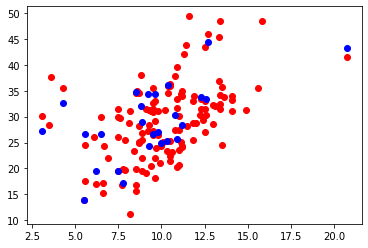

In [15]:
features = list(train.columns.values)
features.remove('Pts')
best_var = ""
best_rsquared_adj = 0.001
rsquared_adj_array = {}
simple_features = ['FirstDownsPass']

for feature in features:
  formula_string = 'Pts~' + feature
  fss_model1 = smf.ols(formula = formula_string, data=train).fit()
  rsquared_adj_array[feature] = fss_model1.rsquared_adj
  if fss_model1.rsquared_adj > best_rsquared_adj:
    best_rsquared_adj = fss_model1.rsquared_adj
    best_var = feature

print('best feature: ' + best_var)
previous_k = ' + ' + best_var
# features.remove(best_var)
formula_string = 'Pts~' + best_var
fss_model1 = smf.ols(formula = formula_string, data=train).fit()
print("R-squared for model with 1 feature1: ", fss_model1.rsquared_adj)
# graph to display
plt.plot(data.FirstDownsPass, data.Pts, 'ro')
prediction = fss_model1.predict(test)
plt.plot(test.FirstDownsPass, prediction, 'bo')
print('formula_string= ', formula_string)
fss_model1.summary()

In [10]:
mean = data.TotalOffenseYds.mean()
std = np.std(data.TotalOffenseYds)
print('standard = ' + str(std))
print('mean = ' + str(mean))

standard = 61.96246412907371
mean = 403.9107692307694


In [11]:
# for i in rsquared_adj_array:
#   plt.plot(rsquared_adj_array[i], 'ro', [i])
rsquared_adj_array

{'PassingCmp': 0.04692168262401453,
 'PassingAtt': -0.009783057327157119,
 'PassingPct': 0.3278777997275333,
 'PassingYds': 0.27936306210005557,
 'PassingTD': 0.5571584600819646,
 'RushingAtt': 0.08149213608993977,
 'RushingYds': 0.30172753899842975,
 'RushingAvg': 0.411343600698294,
 'RushingTD': 0.520141121886681,
 'TotalOffensePlays': 0.1493027474997155,
 'TotalOffenseYds': 0.83943871016178,
 'TotalOffenseAvg': 0.7685637040478088,
 'FirstDownsPass': 0.23004267839198678,
 'FirstDownsRush': 0.2953895172170623,
 'FirstDownsPen': 0.007847206981328125,
 'FirstDownsTot': 0.7401284589168121,
 'PenaltiesNo': -0.0018688681312379885,
 'PenaltiesYds': 0.025752094153242422,
 'TurnoversFum': -0.009797978290504439,
 'TurnoversInt': 0.19437345490148894,
 'TurnoversTot': 0.11530254025293529}



# <h1>Can you simply use correlation for subset selection?</h1>


In [12]:
print(np.corrcoef(copy.Pts, copy.TotalOffenseYds))

[[1.        0.9026205]
 [0.9026205 1.       ]]


In [13]:
coef_dict = {}
for i in features:
  coef_dict[i] = np.corrcoef(copy.Pts, copy[i])[1][0]
coef_dict

{'PassingCmp': 0.24864950352998286,
 'PassingAtt': 0.04586413769706773,
 'PassingPct': 0.5711341078006945,
 'PassingYds': 0.5140254434828901,
 'PassingTD': 0.731306596508961,
 'RushingAtt': 0.20132432024785424,
 'RushingYds': 0.4957452752873938,
 'RushingAvg': 0.6425676492173229,
 'RushingTD': 0.6744194524254494,
 'TotalOffensePlays': 0.3509430601517512,
 'TotalOffenseYds': 0.9026205042187456,
 'TotalOffenseAvg': 0.8815761673556695,
 'FirstDownsPass': 0.4692660330314996,
 'FirstDownsRush': 0.4687011313042761,
 'FirstDownsPen': 0.06053345510751851,
 'FirstDownsTot': 0.8432682810548222,
 'PenaltiesNo': 0.03416376995366363,
 'PenaltiesYds': 0.11740313201470895,
 'TurnoversFum': -0.02324965127236634,
 'TurnoversInt': -0.4285287694286239,
 'TurnoversTot': -0.3495236471469557}

It appears that the highest feature does also have the highest correlation. Will that continue with two features?

# Kris: Continuing Forward Subset Selection 2 Features 

In [14]:
previous_k

' + TotalOffenseYds * TotalOffenseYds'

In [25]:
best_feature = best_var
best_rsquared_adj = 0.001
for feature in features:
    if feature != best_feature:
        formula_string = 'Pts~' + best_feature + ' + ' + feature
        fss_model2 = smf.ols(formula = formula_string, data=train).fit()
        rsquared_adj_array[i] = fss_model2.rsquared_adj
        if fss_model2.rsquared_adj > best_rsquared_adj:
            best_rsquared_adj = fss_model2.rsquared_adj
            best_paired_feature = i

print('The best paired feature for ' + best_feature + ' is ' + best_paired_feature + '.')
# rsquared_adj_array = {}
# for i in features:
#   formula_string = 'Pts~' + i + previous_k
#   fss_model2 = smf.ols(formula = formula_string, data=train).fit()
#   rsquared_adj_array[i] = fss_model2.rsquared_adj
#   if fss_model2.rsquared_adj > best_rsquared_adj:
#     best_rsquared_adj = fss_model2.rsquared_adj
#     best_var = i

# print(best_var)
# previous_k = ' + ' + best_var
# features.remove(best_var)
# formula_string = 'Pts~' + best_var
# fss_model2 = smf.ols(formula = formula_string, data=train).fit()
# print("R-squared for model with 2 features: ", fss_model2.rsquared_adj)
# plt.plot(data.TotalOffenseYds, data.Pts, 'ro')
# prediction = fss_model2.predict(test)
# plt.plot(prediction, 'bo')
# fss_model2.summary()

The best paired feature for TotalOffenseYds is TurnoversTot.


#Greg: Best two features
-Greg, try using %%time to keep track of how long it takes. All you have to do is have %%time at the top of the cell and when it is run it will display the elapsed time. 

In [0]:
%%time